In [214]:
import numpy
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.optimizers import *
from keras.models import Model
from keras.layers import Input

In [222]:
df  = pd.read_csv('thrissur_CSV.csv')

In [223]:
df

,YEAR,MN,DRF01,DRF02,DRF03,DRF04,DRF05,DRF06,DRF07,DRF08,...,DRF22,DRF23,DRF24,DRF25,DRF26,DRF27,DRF28,DRF29,DRF30,DRF31
0,1970,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1970,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1970,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1970,4,0.0,0.0,0.0,0.0,50.0,75.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,1970,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,27.0,32.0,45.0,66.0,61.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,2014,5,0.0,0.0,0.0,0.0,75.0,0.0,2.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,6.0,0.0
412,2014,6,24.0,3.0,25.0,0.0,23.0,0.0,2.0,55.0,...,36.0,8.0,20.0,8.0,0.0,0.0,0.0,14.0,9.0,NaN
413,2015,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
414,2015,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [224]:
result = df.rename(columns={'MN': 'MONTH'}) \
           .set_index(['YEAR', 'MONTH']) \
           .rename_axis('DAY', axis=1) \
           .stack() \
           .to_frame('RAINFALL') \
           .reset_index()

In [225]:
result['DAY'] = result['DAY'].str[-2:].astype('int')
result['DATE'] = pd.to_datetime(result[['YEAR', 'MONTH', 'DAY']])

In [226]:
df=result

In [227]:
df

,YEAR,MONTH,DAY,RAINFALL,DATE
0,1970,1,1,0.0,1970-01-01
1,1970,1,2,0.0,1970-01-02
2,1970,1,3,0.0,1970-01-03
3,1970,1,4,0.0,1970-01-04
4,1970,1,5,0.0,1970-01-05
...,...,...,...,...,...
12560,2015,3,25,0.0,2015-03-25
12561,2015,3,26,0.0,2015-03-26
12562,2015,3,27,0.0,2015-03-27
12563,2015,3,28,0.0,2015-03-28


In [228]:
df = df.drop(df.columns[[0, 1, 2]], axis=1)

In [229]:
df

,RAINFALL,DATE
0,0.0,1970-01-01
1,0.0,1970-01-02
2,0.0,1970-01-03
3,0.0,1970-01-04
4,0.0,1970-01-05
...,...,...
12560,0.0,2015-03-25
12561,0.0,2015-03-26
12562,0.0,2015-03-27
12563,0.0,2015-03-28


In [230]:
cols = df.columns.tolist()

cols = cols[-1:] + cols[:-1]

df = df[cols] 

In [231]:
df

,DATE,RAINFALL
0,1970-01-01,0.0
1,1970-01-02,0.0
2,1970-01-03,0.0
3,1970-01-04,0.0
4,1970-01-05,0.0
...,...,...
12560,2015-03-25,0.0
12561,2015-03-26,0.0
12562,2015-03-27,0.0
12563,2015-03-28,0.0


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12565 entries, 0 to 12564
Data columns (total 2 columns):
DATE        12565 non-null datetime64[ns]
RAINFALL    12565 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 196.5 KB


In [233]:
df.dtypes

DATE        datetime64[ns]
RAINFALL           float64
dtype: object

In [234]:
df=df.set_index(df['DATE'])

In [235]:
df.head()

,DATE,RAINFALL
DATE,,
1970-01-01,1970-01-01,0.0
1970-01-02,1970-01-02,0.0
1970-01-03,1970-01-03,0.0
1970-01-04,1970-01-04,0.0
1970-01-05,1970-01-05,0.0


In [236]:
df = df.drop(df.columns[[0]], axis=1)

In [237]:
df

,RAINFALL
DATE,
1970-01-01,0.0
1970-01-02,0.0
1970-01-03,0.0
1970-01-04,0.0
1970-01-05,0.0
...,...
2015-03-25,0.0
2015-03-26,0.0
2015-03-27,0.0


In [238]:
df.isnull().sum()

RAINFALL    0
dtype: int64

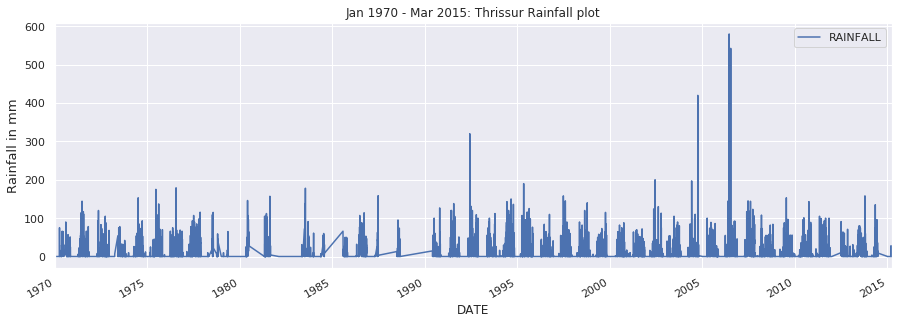

In [239]:
df.plot(figsize=(15,5),title="Jan 1970 - Mar 2015: Thrissur Rainfall plot",grid=True)
plt.ylabel('Rainfall in mm', fontsize = 13)
plt.legend(loc = 'best')

In [240]:
df1 = df[:730]

In [241]:
df1

,RAINFALL
DATE,
1970-01-01,0.0
1970-01-02,0.0
1970-01-03,0.0
1970-01-04,0.0
1970-01-05,0.0
...,...
1972-01-27,0.0
1972-01-28,0.0
1972-01-29,0.0


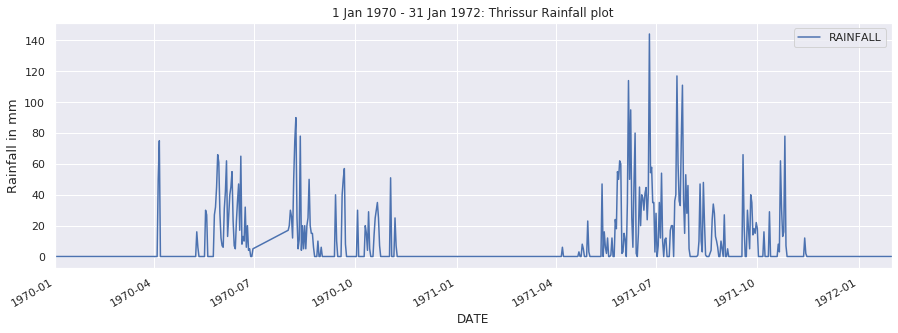

In [242]:
df1.plot(figsize=(15,5),title="1 Jan 1970 - 31 Jan 1972: Thrissur Rainfall plot",grid=True)
plt.ylabel('Rainfall in mm', fontsize = 13)
plt.legend(loc = 'best')

In [243]:
df

,RAINFALL
DATE,
1970-01-01,0.0
1970-01-02,0.0
1970-01-03,0.0
1970-01-04,0.0
1970-01-05,0.0
...,...
2015-03-25,0.0
2015-03-26,0.0
2015-03-27,0.0


In [244]:
dataset = df

In [245]:
dataset.dtypes

RAINFALL    float64
dtype: object

In [213]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [191]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

8418 4147


In [192]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [193]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [194]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [196]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(100, input_shape=(1, look_back)))
#model.add(Dense(70,stateful=True))
model.add(Dense(30, activation='relu'))
model.add(Dense(1))
model.compile(loss='mae', optimizer='RMSprop')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 10s - loss: 0.0140
Epoch 2/100
 - 10s - loss: 0.0136
Epoch 3/100
 - 10s - loss: 0.0135
Epoch 4/100
 - 11s - loss: 0.0134
Epoch 5/100
 - 12s - loss: 0.0134
Epoch 6/100
 - 12s - loss: 0.0135
Epoch 7/100
 - 12s - loss: 0.0134
Epoch 8/100
 - 14s - loss: 0.0134
Epoch 9/100
 - 13s - loss: 0.0134
Epoch 10/100
 - 11s - loss: 0.0134
Epoch 11/100
 - 11s - loss: 0.0134
Epoch 12/100
 - 11s - loss: 0.0134
Epoch 13/100
 - 11s - loss: 0.0134
Epoch 14/100
 - 12s - loss: 0.0134
Epoch 15/100
 - 12s - loss: 0.0134
Epoch 16/100
 - 14s - loss: 0.0133
Epoch 17/100
 - 14s - loss: 0.0133
Epoch 18/100
 - 12s - loss: 0.0133
Epoch 19/100
 - 12s - loss: 0.0134
Epoch 20/100
 - 11s - loss: 0.0133
Epoch 21/100
 - 11s - loss: 0.0134
Epoch 22/100
 - 12s - loss: 0.0133
Epoch 23/100
 - 11s - loss: 0.0133
Epoch 24/100
 - 12s - loss: 0.0133
Epoch 25/100
 - 11s - loss: 0.0133
Epoch 26/100
 - 11s - loss: 0.0133
Epoch 27/100
 - 12s - loss: 0.0134
Epoch 28/100
 - 11s - loss: 0.0133
Epoch 29/100
 - 11s - loss: 0

In [197]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [198]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [199]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 18.42 RMSE
Test Score: 21.88 RMSE


In [200]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [201]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

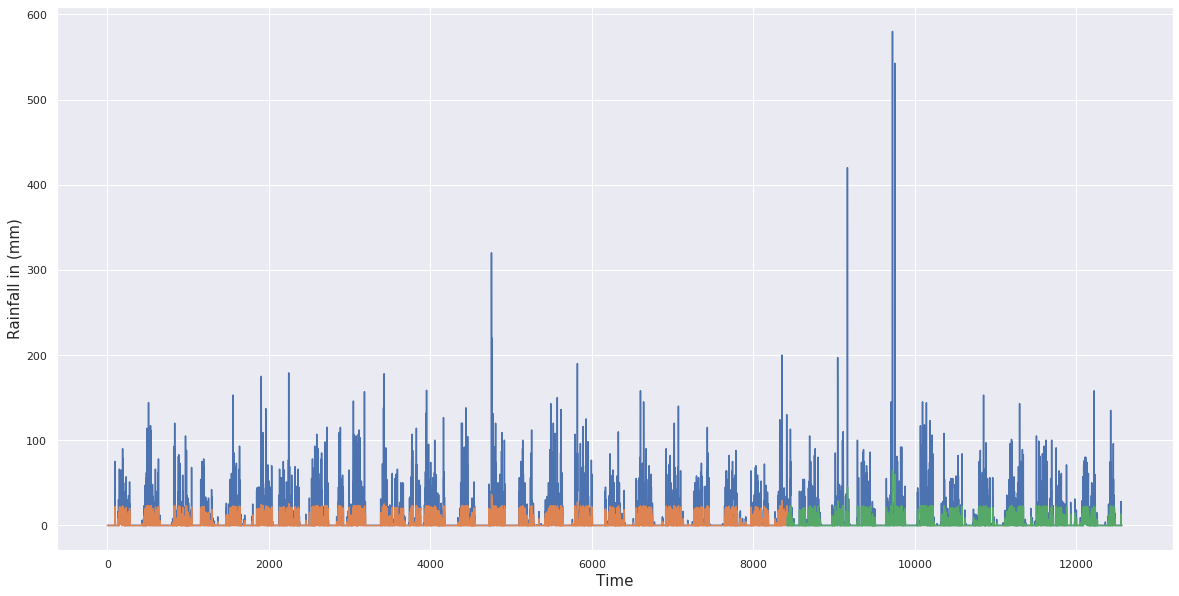

In [209]:
# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Rainfall in (mm)', fontsize = 15)
#plt.legend(loc = 'best')
#plt.legend()
plt.show()


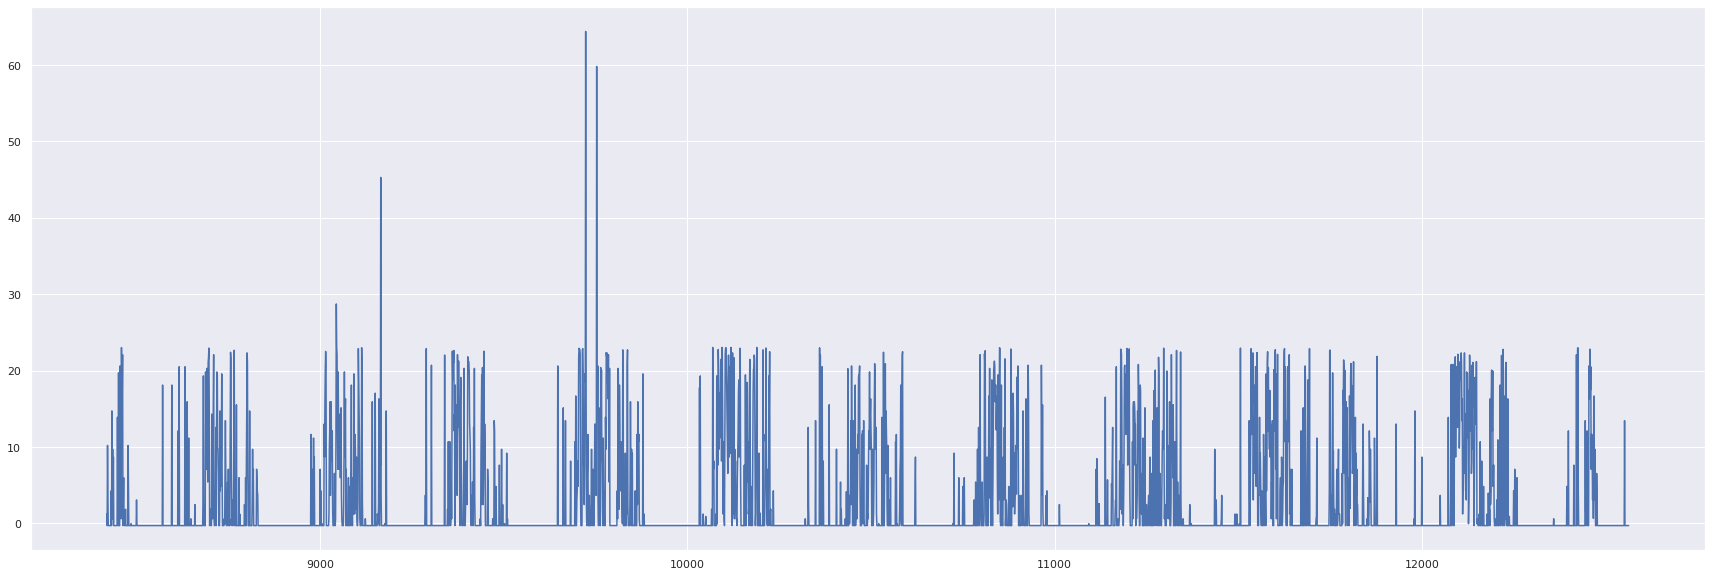

In [210]:
plt.figure(figsize=(30,10))
plt.plot(testPredictPlot)